# Plot HBA SST's

In [1]:
from sst_bst import SSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#input_label = [ f'LBA_{cnt//2}Y' if cnt%2 else f'LBA_{cnt//2}X' for cnt in range(18)]
input_label = ['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y']
input_label += ['Not Used','Not Used','Not Used','Not Used','Not Used','Not Used']
input_label += [ 'HBAT_9_X', 'HBAT_9_Y','HBAT_14_X','HBAT_14_Y', 'HBAT_16_X', 'HBAT_16_Y', 'HBAT_33_X', 'HBAT_33_Y', 'HBAT_38_X', 'HBAT_38_Y', 'HBAT_40_X', 'HBAT_40_Y']
print(input_label)

['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y', 'Not Used', 'Not Used', 'Not Used', 'Not Used', 'Not Used', 'Not Used', 'HBAT_9_X', 'HBAT_9_Y', 'HBAT_14_X', 'HBAT_14_Y', 'HBAT_16_X', 'HBAT_16_Y', 'HBAT_33_X', 'HBAT_33_Y', 'HBAT_38_X', 'HBAT_38_Y', 'HBAT_40_X', 'HBAT_40_Y']


In [3]:
sis=range(8*3,8*3+6); #signal inputs
#START_TIME="2022-12-22 12:30:00"
#END_TIME=  "2023-01-03 12:30:00"
#tstep_min=10;
START_TIME="2022-12-30 08:00:00"
END_TIME=  "2022-12-30 14:00:00"
#tstep_min=1;

#bands=range(512) #all bands

In [4]:
sst=SSTs('sst') #sst directoty
tstart=datetime.fromisoformat(START_TIME) 
tend  =datetime.fromisoformat(END_TIME)
D=sst.getData(tstart,tend,sis) 


Load SST sst/SST_2022-12-30-07-24-40.h5
Load SST sst/SST_2022-12-30-08-24-40.h5
Load SST sst/SST_2022-12-30-09-24-40.h5
Load SST sst/SST_2022-12-30-10-24-40.h5
Load SST sst/SST_2022-12-30-11-24-40.h5
Load SST sst/SST_2022-12-30-12-24-40.h5
Load SST sst/SST_2022-12-30-13-24-40.h5


In [5]:
input_label = input_label[8*3:]
print(input_label)

['HBAT_9_X', 'HBAT_9_Y', 'HBAT_14_X', 'HBAT_14_Y', 'HBAT_16_X', 'HBAT_16_Y', 'HBAT_33_X', 'HBAT_33_Y', 'HBAT_38_X', 'HBAT_38_Y', 'HBAT_40_X', 'HBAT_40_Y']


In [6]:
plt.figure(dpi=300)
FS=200
FFT_POINTS=512
STATION_NAME = 'CS001c'
f_as = [200-(FS*cnt)/(2*FFT_POINTS) for cnt in range(FFT_POINTS)]
for cnt, f_si in enumerate(D[1,:,:]):
    plot_data = 10 * np.log10(f_si + 1) - 128 - 6 * 4
    plt_label = input_label[cnt]
    plt.plot(f_as, plot_data, label = plt_label)
plt.grid()
plt.xlim([100,200])
#plt.ylim(-88,-80)
plt.legend(fontsize='xx-small',ncol=4)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB full scale)")
plt.title(f"Subband Statistics HBA {STATION_NAME}; {START_TIME}")
plt.show()

    

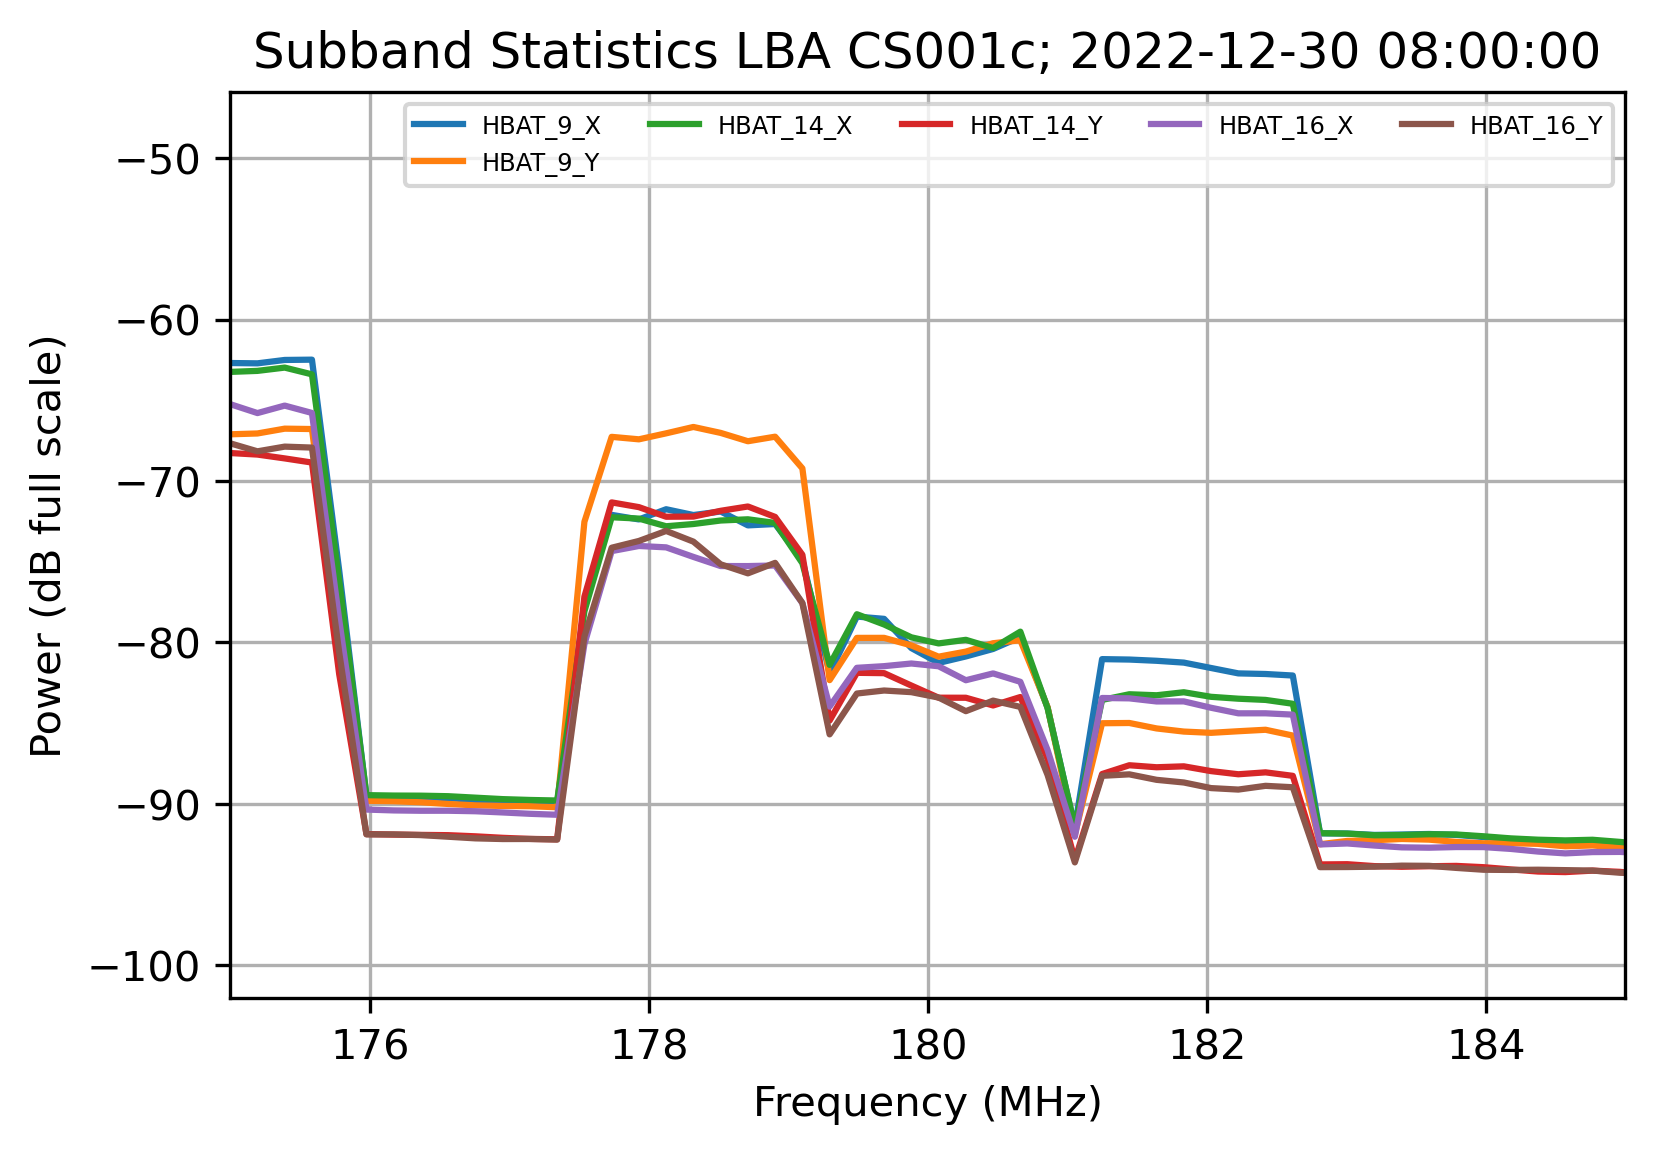

In [7]:
plt.figure(dpi=300)
for cnt in range(6):
    plot_data = 10 * np.log10(D[:,cnt,:]) - 128 - 6 * 4
    plot_data=np.percentile(plot_data,50,axis=0)
    plt_label = input_label[cnt]
    plt.plot(f_as, plot_data, label = plt_label)
plt.grid()
plt.xlim([175,185])
plt.legend(fontsize='xx-small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB full scale)")
plt.title(f"Subband Statistics LBA {STATION_NAME}; {START_TIME}")
plt.show()


In [8]:
freqs=200-np.arange(512)/512*100
freq1=120;i1=np.argmin(np.abs(freqs-freq1))
#freq1=10.75;i1=np.argmin(np.abs(freqs-freq1))
#freq1=16.35;i1=np.argmin(np.abs(freqs-freq1))
freq2=170;i2=np.argmin(np.abs(freqs-freq2))
freq3=162;i3=np.argmin(np.abs(freqs-freq3))
#print(i2,i1,freqs[i1],freqs[i2])

In [9]:
#sky=np.load("../L2TS_cal/Sky2022-11-04-16-00-00_40.npy")
#skyhour=np.arange(24*60/60)
#print(sky.shape,len(skyhour))
print(D.shape)

(21601, 6, 512)


In [10]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/60/60#*tstep_min
for i in [i1]:
    Pwr=(10*np.log10(D[:,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(3):
        plt.plot(hour_of_day,Pwr[:,l],label=input_label[l*2]);
    print(i,np.max(Pwr),np.argmax(Pwr),(np.argmax(Pwr))/360)
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since ' + START_TIME)
plt.title("L2TS SST power (%.1f MHz)"%freqs[i])
plt.grid()
#plt.ylim(-2,-1)

410 10.02478 46212 128.36666666666667


In [12]:
plt.figure(dpi=300)
for i in [i1]:
    Pwr=(10*np.log10(D[:,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(3):
        plt.plot(hour_of_day,Pwr[:,l],label=input_label[l*2]);
plt.gca().set_prop_cycle(None)
for i in [i1]:
    Pwr=(10*np.log10(D[:,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(3):
        plt.plot(hour_of_day,Pwr[:,l],':',label=input_label[(l*2)+1]);

plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='xx-small',ncol=4)
plt.xlabel('Hours since ' + START_TIME)
plt.title("L2TS SST power (%.1f MHz)"%freqs[i])
plt.grid()

In [13]:
lba_si_nr = 0
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(freqs, yas, 10*np.log10(D[:,lba_si_nr,:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.clim([-90, -84])
plt.ylim(3,4)
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.title(f" Spectrogam of HBA input nr {input_label[lba_si_nr]}")
#plt.savefig("./results/sst_lba_waterval.png")

Text(0.5, 1.0, ' Spectrogam of HBA input nr HBAT_9_X')

In [19]:
lba_si_nr = 0
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
#plt.pcolor(freqs, yas[2000:3000], 10*np.log10(D[2000:3000,lba_si_nr,:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.clim([-90, -84])
plt.title(f" Spectrogam of HBA input nr {input_label[lba_si_nr]}")
#plt.savefig("./results/sst_lba_waterval.png")
#plt.ylim(180,200)
plt.xlim(110,180)
plt.ylim(0.6,0.65)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 1800x1200 with 0 Axes>